In [345]:
import pandas as pd
import datetime
import numpy as np

In [346]:
wines_ = pd.read_excel("data/Subset1.xls", 1)
print(min(wines_['DOY']))

213.0


On ne peut donc au maximum prendre comme data que les 213 jours précédent la récolte, une information supplémentaire n'est probablement pas importante car on va surtout analyser l'effet de la météo d'une année sur le vin

In [347]:
wines_.dropna(subset = ['Harvest date'], inplace=True)
wines_.reset_index(drop=True, inplace=True)

In [348]:
weather = pd.read_excel("data/Subset3.xls", [1,2,3,4,5])
weather[1]

,Year,Month,day,Tave,Tmax,Tmin,DOY,Unnamed: 7,Year.1,GST,WI,HI
0,1911,1,1,8.35,16.7,0.0,1,NaN,1911.0,15.073364,1099.050000,967.254052
1,1911,1,2,8.85,19.4,-1.7,2,NaN,1912.0,15.752336,1246.550000,1146.450272
2,1911,1,3,6.65,16.1,-2.8,3,NaN,1913.0,16.722430,1446.300000,1276.779404
3,1911,1,4,8.30,18.3,-1.7,4,NaN,1914.0,15.678579,1217.966001,1103.276910
4,1911,1,5,7.80,18.9,-3.3,5,NaN,1915.0,15.950196,1277.291993,1133.617078
...,...,...,...,...,...,...,...,...,...,...,...,...
36885,2011,12,27,6.95,15.6,-1.7,361,NaN,NaN,NaN,NaN,NaN
36886,2011,12,28,11.65,19.4,3.9,362,NaN,NaN,NaN,NaN,NaN
36887,2011,12,29,11.15,16.7,5.6,363,NaN,NaN,NaN,NaN,NaN
36888,2011,12,30,12.20,15.0,9.4,364,NaN,NaN,NaN,NaN,NaN


In [349]:
i = list(range(1,201))
i = list(map(str, i))
iavg = ['avg' + item for item in i]
imin = ['min' + item for item in i]
imax = ['max' + item for item in i]
temp_avg = pd.DataFrame(columns = iavg)
temp_min = pd.DataFrame(columns = imin)
temp_max = pd.DataFrame(columns = imax)

In [350]:
wines = wines_.copy()

In [351]:
for i in range(len(wines)):
    new_row = []
    r = wines["Reg"][i]
    d = wines['Harvest date'][i]
    h = int(wines['DOY'][i])
    new_row = list(weather[r].loc[(weather[r]['Year'] == d.year) & (weather[r]['DOY'].isin(range(h-200,h)))]['Tave'])
    if len(new_row) != 200:
        new_row = [float('nan')] * 200
    temp_avg.loc[len(temp_avg)] = new_row

In [352]:
for i in range(len(wines)):
    new_row = []
    r = wines["Reg"][i]
    d = wines['Harvest date'][i]
    h = int(wines['DOY'][i])
    new_row = list(weather[r].loc[(weather[r]['Year'] == d.year) & (weather[r]['DOY'].isin(range(h-200,h)))]['Tmin'])
    if len(new_row) != 200:
        new_row = [float('nan')] * 200
    temp_min.loc[len(temp_min)] = new_row
temp_min.head()

,min1,min2,min3,min4,min5,min6,min7,min8,min9,min10,...,min191,min192,min193,min194,min195,min196,min197,min198,min199,min200
0,8.3,12.2,10.6,7.8,4.4,3.3,1.7,1.1,7.2,7.2,...,11.1,11.7,10.6,9.4,11.7,13.3,13.3,11.7,11.7,12.2
1,7.8,8.9,9.4,6.1,8.3,6.1,7.2,8.3,9.4,11.7,...,7.8,9.4,8.9,7.2,8.9,10.0,9.4,7.8,8.3,10.0
2,5.0,7.8,10.0,4.4,0.6,5.0,5.0,5.0,1.7,1.7,...,8.9,7.8,13.3,6.7,5.0,6.7,8.3,7.2,13.9,8.3
3,1.1,1.1,8.3,5.0,3.9,0.6,1.7,2.8,3.9,7.2,...,14.4,12.8,12.2,9.4,11.7,10.6,12.2,8.9,12.2,10.0
4,6.1,2.2,3.3,10.6,8.3,10.0,5.6,0.6,2.8,6.7,...,6.1,7.2,7.2,10.6,10.0,11.1,8.3,10.0,11.1,11.1


In [353]:
for i in range(len(wines)):
    new_row = []
    r = wines["Reg"][i]
    d = wines['Harvest date'][i]
    h = int(wines['DOY'][i])
    new_row = list(weather[r].loc[(weather[r]['Year'] == d.year) & (weather[r]['DOY'].isin(range(h-200,h)))]['Tmax'])
    if len(new_row) != 200:
        new_row = [float('nan')] * 200
    temp_max.loc[len(temp_max)] = new_row

KeyboardInterrupt: 

In [ ]:
# Use pandas get_dummies() function to one-hot encode the 'fruits' column
one_hot_data = pd.get_dummies(wines['Cultivar'])

# Concatenate the one-hot encoded DataFrame with the original DataFrame
dataset2 = pd.concat([wines, one_hot_data], axis=1)

# Drop the original 'fruits' column
dataset2.drop('Cultivar', axis=1, inplace=True)

# Print the resulting DataFrame with one-hot encoded column
dataset2

,Table.No.,Color,Recommend,RecReg,Reg,Harvest date,DOY,Must.Brix,Must.Tacid,Must.pH,...,Trousseau,Valdepes,Verccia Sarda,Verccia bianca,Verdelho,Vermentino Favorita,Walschriesling,White Riesling,Zinfandel,sa Veltliner
0,9,White,Particularly recommended,1.0,3,1936-09-08,251.0,27.2,0.54,3.88,...,False,False,False,False,False,False,False,False,False,False
1,9,White,Particularly recommended,1.0,4,1936-08-31,243.0,23.5,0.67,3.79,...,False,False,False,False,False,False,False,False,False,False
2,9,White,Particularly recommended,1.0,1,1937-10-01,273.0,22.1,0.72,3.38,...,False,False,False,False,False,False,False,False,False,False
3,9,White,Particularly recommended,1.0,3,1937-09-11,253.0,24.6,0.63,3.69,...,False,False,False,False,False,False,False,False,False,False
4,9,White,Particularly recommended,1.0,1,1938-09-14,256.0,19.8,0.78,3.19,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,25,Red,Table grape,NaN,4,1937-10-25,297.0,21.8,0.47,3.74,...,False,False,False,False,False,False,False,False,False,False
1469,25,Red,Table grape,NaN,4,1940-10-07,280.0,22.7,0.36,3.90,...,False,False,False,False,False,False,False,False,False,False
1470,25,Red,Table grape,NaN,4,1935-11-01,304.0,20.2,0.55,NaN,...,False,False,False,False,False,False,False,False,False,False
1471,25,Red,Table grape,NaN,4,1937-10-13,285.0,17.6,0.50,3.58,...,False,False,False,False,False,False,False,False,False,False


### dataset2 ne sera probablement pas utile. En effet on augmente beaucoup trop la dimension par rapport à la quantité de données.

problem : there are a lot of different categories so there are many dimensions added. We already had a dimension to high compared to the amount of observations so this pnly increases the problem.

In [ ]:
# Use pandas get_dummies() function to one-hot encode the 'fruits' column
one_hot_data3 = pd.get_dummies(wines['Color'])

# Concatenate the one-hot encoded DataFrame with the original DataFrame
dataset3 = pd.concat([wines, one_hot_data3], axis=1)

# Drop the original 'fruits' column
dataset3.drop('Color', axis=1, inplace=True)

# Print the resulting DataFrame with one-hot encoded column
dataset3

,Table.No.,Cultivar,Recommend,RecReg,Reg,Harvest date,DOY,Must.Brix,Must.Tacid,Must.pH,Wine.Alcohol,Wine.Facid,Wine.Extract,Wine.Tannin,Wine.Tasting,Red,White
0,9,Chardony,Particularly recommended,1.0,3,1936-09-08,251.0,27.2,0.54,3.88,15.6,0.42,4.0,0.03,"Very distinct; good, but alcoholic",False,True
1,9,Chardony,Particularly recommended,1.0,4,1936-08-31,243.0,23.5,0.67,3.79,13.0,0.39,NaN,NaN,Distinct; lacks acid; standard quality,False,True
2,9,Chardony,Particularly recommended,1.0,1,1937-10-01,273.0,22.1,0.72,3.38,12.0,0.52,2.0,0.03,Light body; fruity; distinct; good quality,False,True
3,9,Chardony,Particularly recommended,1.0,3,1937-09-11,253.0,24.6,0.63,3.69,12.8,0.49,2.1,0.03,Flat; tends to oxidize; but distinct,False,True
4,9,Chardony,Particularly recommended,1.0,1,1938-09-14,256.0,19.8,0.78,3.19,10.5,0.68,2.8,0.07,"Tart, but palatable; distinct; picked too early",False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,25,Red Malaga (Molinera),Table grape,NaN,4,1937-10-25,297.0,21.8,0.47,3.74,12.0,0.28,2.3,0.04,Very flat; some spoilage; very ordiry sherry,True,False
1469,25,Red Malaga (Molinera),Table grape,NaN,4,1940-10-07,280.0,22.7,0.36,3.90,12.4,0.40,2.8,0.04,Flat; pink; very common; lacks everything,True,False
1470,25,Ribier,Table grape,NaN,4,1935-11-01,304.0,20.2,0.55,NaN,10.8,0.34,2.5,0.08,"Flat; poor; sherry; soft, but no character",True,False
1471,25,Ribier,Table grape,NaN,4,1937-10-13,285.0,17.6,0.50,3.58,9.5,0.35,2.1,0.06,Flat; ordiry; tends to spoil,True,False


### On a seulement deux catégories donc la notion d'équidistence entre chaque catégorie n'est pas forcément importante, on peut se contenter d'encoder par 0 1 ou -1 1 et par la même occasion ne pas augmenter non nécessairement la dimension.

In [ ]:
mapping = {'White': -1, 'Red': 1}

# Apply the mapping to the 'category' column using the map() function
wines['Color'] = wines['Color'].map(mapping)

wines

,Table.No.,Cultivar,Color,Recommend,RecReg,Reg,Harvest date,DOY,Must.Brix,Must.Tacid,Must.pH,Wine.Alcohol,Wine.Facid,Wine.Extract,Wine.Tannin,Wine.Tasting
0,9,Chardony,NaN,Particularly recommended,1.0,3,1936-09-08,251.0,27.2,0.54,3.88,15.6,0.42,4.0,0.03,"Very distinct; good, but alcoholic"
1,9,Chardony,NaN,Particularly recommended,1.0,4,1936-08-31,243.0,23.5,0.67,3.79,13.0,0.39,NaN,NaN,Distinct; lacks acid; standard quality
2,9,Chardony,NaN,Particularly recommended,1.0,1,1937-10-01,273.0,22.1,0.72,3.38,12.0,0.52,2.0,0.03,Light body; fruity; distinct; good quality
3,9,Chardony,NaN,Particularly recommended,1.0,3,1937-09-11,253.0,24.6,0.63,3.69,12.8,0.49,2.1,0.03,Flat; tends to oxidize; but distinct
4,9,Chardony,NaN,Particularly recommended,1.0,1,1938-09-14,256.0,19.8,0.78,3.19,10.5,0.68,2.8,0.07,"Tart, but palatable; distinct; picked too early"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,25,Red Malaga (Molinera),NaN,Table grape,NaN,4,1937-10-25,297.0,21.8,0.47,3.74,12.0,0.28,2.3,0.04,Very flat; some spoilage; very ordiry sherry
1469,25,Red Malaga (Molinera),NaN,Table grape,NaN,4,1940-10-07,280.0,22.7,0.36,3.90,12.4,0.40,2.8,0.04,Flat; pink; very common; lacks everything
1470,25,Ribier,NaN,Table grape,NaN,4,1935-11-01,304.0,20.2,0.55,NaN,10.8,0.34,2.5,0.08,"Flat; poor; sherry; soft, but no character"
1471,25,Ribier,NaN,Table grape,NaN,4,1937-10-13,285.0,17.6,0.50,3.58,9.5,0.35,2.1,0.06,Flat; ordiry; tends to spoil


In [ ]:
#reduction de dimension, ca enleve la variabilité des données qui correspondent au bruit donc ca permet de savoir ce qu'est vraiment nos données
#elimination de variable, on entraine un modele sur nos donneés, on trouve la variable (l'attribut) qui contirbue le moins et on la supprimes

#fonction qui prend en argument le chiffre par lequel on va partioonner notre dataset : exemple 10 alors il y aura 10 colonnes 
#de temperature qui vont prendre la moyenne des 20 jours sur lequel ils sont
def colonne_nb_jour_avg(nb_jour):
    temperatures_bis = pd.DataFrame()
    addition = temp_avg.shape[1]//nb_jour
    if temp_avg.shape[1]%nb_jour !=0:
        print("trouver une autre valeur")
    else:
        for index in range(nb_jour): 
            colonnes = []
            for i in range(index*addition+1, index*addition+ addition +1):
                colonnes.append(f"avg{i}")  
            moyenne = temp_avg[colonnes].mean(axis=1)
            temperatures_bis[f"avg{index + 1}"] = moyenne
    return temperatures_bis


In [ ]:
def colonne_nb_jour_min(nb_jour):
    temperatures_bis = pd.DataFrame()
    addition = temp_min.shape[1]//nb_jour
    if temp_min.shape[1]%nb_jour !=0:
        print("trouver une autre valeur")
    else:
        for index in range(nb_jour): 
            colonnes = []
            for i in range(index*addition+1, index*addition+ addition +1):
                colonnes.append(f"min{i}")  
            min = temp_min[colonnes].min(axis=1)
            temperatures_bis[f"min{index + 1}"] = min
    return temperatures_bis

In [ ]:
def colonne_nb_jour_max(nb_jour):
    temperatures_bis = pd.DataFrame()
    addition = temp_max.shape[1]//nb_jour
    if temp_max.shape[1]%nb_jour !=0:
        print("trouver une autre valeur")
    else:
        for index in range(nb_jour): 
            colonnes = []
            for i in range(index*addition+1, index*addition+ addition +1):
                colonnes.append(f"max{i}")  
            max = temp_max[colonnes].max(axis=1)
            temperatures_bis[f"max{index + 1}"] = max
    return temperatures_bis

In [ ]:
colonne_nb_jour_min(10).head()

,min1,min2,min3,min4,min5,min6,min7,min8,min9,min10
0,1.1,-1.1,3.9,5.6,4.4,6.700000,7.800000,7.800000,10.6,7.8
1,1.7,3.3,-2.2,4.4,4.4,5.000000,8.300000,8.900000,10.0,7.2
2,0.6,1.7,1.1,4.4,6.7,7.800000,7.800000,5.600000,5.0,5.0
3,0.6,2.2,2.2,2.2,6.1,8.900000,8.900000,10.000000,8.3,7.8
4,0.6,-1.1,0.6,0.0,0.6,2.799074,7.522936,3.730556,4.4,5.0


In [ ]:
#pour faire avec 10 colonnes
new_temp_min = colonne_nb_jour_min(10)
new_temp_max =colonne_nb_jour_max(10)
new_temp_avg=colonne_nb_jour_avg(10)


In [ ]:
def count_values_in_interval(row, interval_start, interval_end):
    count = 0
    for val in row:
        if interval_start <= val < interval_end:
            count += 1
    return count


In [ ]:
#choice = 2 pour utiliser avg, 1 pour min 3 pour max
#il faudra le faire sur les données preprocess ici par le cas 
def intervalle(choice):
    if choice == 1:
        temp= temp_min
    if choice == 2:
        temp= temp_avg
    if choice == 3:
        temp= temp_max
    df = pd.DataFrame()
    df["intervalle_-5"] = temp.apply(lambda row: count_values_in_interval(row, -50, -5), axis=1)
    df["intervalle_-5-0"] = temp.apply(lambda row: count_values_in_interval(row, -5, 0), axis=1)
    df["intervalle_0-5"] = temp.apply(lambda row: count_values_in_interval(row, 0, 5), axis=1)
    df["intervalle_5-10"] = temp.apply(lambda row: count_values_in_interval(row, 5, 10), axis=1)
    df["intervalle_10-15"] = temp.apply(lambda row: count_values_in_interval(row, 10, 15), axis=1)
    df["intervalle_15-20"] = temp.apply(lambda row: count_values_in_interval(row, 15, 20), axis=1)
    df["intervalle_20-25"] = temp.apply(lambda row: count_values_in_interval(row, 20, 25), axis=1)
    df["intervalle_25-30"] = temp.apply(lambda row: count_values_in_interval(row, 25, 30), axis=1)
    df["intervalle_30-35"] = temp.apply(lambda row: count_values_in_interval(row, 30, 35), axis=1)
    df["intervalle_35-40"] = temp.apply(lambda row: count_values_in_interval(row, 35, 40), axis=1)
    df["intervalle_40-"] = temp.apply(lambda row: count_values_in_interval(row, 40, 100), axis=1)
    return df

In [ ]:
wines['Wine.Tannin'].max()-wines['Wine.Tannin'].min()

0.94

In [ ]:
df_intervalle = intervalle(2)
df_intervalle

,intervalle_-5,intervalle_-5-0,intervalle_0-5,intervalle_5-10,intervalle_10-15,intervalle_15-20,intervalle_20-25,intervalle_25-30,intervalle_30-35,intervalle_35-40,intervalle_40-
0,0,0,0,11,52,51,68,18,0,0,0
1,0,0,0,12,48,53,58,29,0,0,0
2,0,0,0,7,41,104,45,3,0,0,0
3,0,0,0,15,47,64,56,17,1,0,0
4,0,0,0,12,68,99,21,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1468,0,0,0,1,19,70,81,27,2,0,0
1469,0,0,0,1,23,53,109,14,0,0,0
1470,0,0,0,2,22,81,70,23,2,0,0
1471,0,0,0,1,31,62,77,27,2,0,0


In [ ]:
from sklearn.feature_extraction import FeatureHasher


# Instantiate a FeatureHasher object with the desired number of output features (n_features)
hasher = FeatureHasher(n_features=20, input_type='string')
cultivar_list = [[x] for x in wines['Cultivar'].tolist()]
# Perform feature hashing on the 'fruits' column
hashed_features = hasher.fit_transform(cultivar_list)

# Convert the hashed features to a dense NumPy array and create a DataFrame
hashed_features_df = pd.DataFrame(hashed_features.toarray())

# Concatenate the hashed features DataFrame with the original DataFrame
dataset4 = pd.concat([wines, hashed_features_df], axis=1)

# Drop the original 'fruits' column
dataset4.drop('Cultivar', axis=1, inplace=True)
dataset4.head()


,Table.No.,Color,Recommend,RecReg,Reg,Harvest date,DOY,Must.Brix,Must.Tacid,Must.pH,...,10,11,12,13,14,15,16,17,18,19
0,9,-1,Particularly recommended,1.0,3,1936-09-08,251.0,27.2,0.54,3.88,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0
1,9,-1,Particularly recommended,1.0,4,1936-08-31,243.0,23.5,0.67,3.79,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0
2,9,-1,Particularly recommended,1.0,1,1937-10-01,273.0,22.1,0.72,3.38,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0
3,9,-1,Particularly recommended,1.0,3,1937-09-11,253.0,24.6,0.63,3.69,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0
4,9,-1,Particularly recommended,1.0,1,1938-09-14,256.0,19.8,0.78,3.19,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0


In [354]:
dataset = pd.concat([wines,new_temp_avg, new_temp_min, new_temp_max], axis = 1)

### On utilisera cet encodage par la suite dans certaines analyses. la méthode par arbre nous permettra quand à elle de rester sur des données encodées par des str

In [ ]:
dataset.nunique(axis=0)

Table.No.     17
Cultivar     148
Color          0
Recommend      5
RecReg         5
            ... 
max196       109
max197       110
max198       118
max199       109
max200       114
Length: 616, dtype: int64

In [ ]:
print(dataset.isna().sum()) #il faudrait trouver et enlever les 102 wines ou on a pas la temperature selon mon avis 

Table.No.       0
Cultivar        0
Color        1473
Recommend       0
RecReg       1025
             ... 
max196        102
max197        102
max198        102
max199        102
max200        102
Length: 616, dtype: int64


# Mise en place d'une analyse avec tout d'abord la color du wine comme attribute et le ph à prédire

In [355]:
dataset2 = pd.concat([new_temp_avg, new_temp_min, new_temp_max], axis = 1)

In [356]:
copie = dataset.copy()
#enlever les colonnes qu'on ne compte pas utiliser
copie = copie.drop(columns = ['Table.No.', 'Cultivar', 'Recommend', 'RecReg', 'Reg', 'Wine.Alcohol',
       'Harvest date', 'DOY', 'Must.pH','Must.Brix', 'Must.Tacid', 'Wine.Facid', 'Wine.Extract',
       'Wine.Tasting'])
#verifier qu'on a nos colonnes désirées
copie.columns 

Index(['Color', 'Wine.Tannin', 'avg1', 'avg2', 'avg3', 'avg4', 'avg5', 'avg6',
       'avg7', 'avg8', 'avg9', 'avg10', 'min1', 'min2', 'min3', 'min4', 'min5',
       'min6', 'min7', 'min8', 'min9', 'min10', 'max1', 'max2', 'max3', 'max4',
       'max5', 'max6', 'max7', 'max8', 'max9', 'max10'],
      dtype='object')

In [357]:
columns = list(copie.columns)
print(columns)
#delete row with value = Nan
#voir si pour les y on peut pas remplacer par une valeur :
# d'autres possibilités (ffill et bfill qui propagent les valeurs observées aux voisines Nan)
# imputation par la moyenne (possible aussi avec la mediane)
# exemple :           movies_df['budget'].fillna(movies_df['budget'].mean(), inplace=True)
copie.dropna(subset = columns, inplace=True)
copie.reset_index(drop=True, inplace=True)

['Color', 'Wine.Tannin', 'avg1', 'avg2', 'avg3', 'avg4', 'avg5', 'avg6', 'avg7', 'avg8', 'avg9', 'avg10', 'min1', 'min2', 'min3', 'min4', 'min5', 'min6', 'min7', 'min8', 'min9', 'min10', 'max1', 'max2', 'max3', 'max4', 'max5', 'max6', 'max7', 'max8', 'max9', 'max10']


In [358]:
# selection of class to predict : here ph
y = copie[['Wine.Tannin']]

# temperature and color extraction
colonnes = list(dataset2.columns)
colonnes.append('Color')

# récupération des valeurs de toutes les colonnes à la suite
X = copie[colonnes]

In [359]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [360]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
#on fit (calcule mean et std) sur toutes les colonnes temperature a la fois pas que les colonnes
scaler.fit(X_train[list(dataset2.columns)].values.ravel().reshape(-1, 1))

#on remplace nos colonnes par nos valeurs standardizer
for col in dataset2.columns:
    X_train[col] = scaler.transform(X_train[[col]])
    X_test[col] = scaler.transform(X_test[[col]])

X_train

/home/amelie/Documents/Cours Dauphine/M1/S2/projet_ml/projet_wine/env/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/home/amelie/Documents/Cours Dauphine/M1/S2/projet_ml/projet_wine/env/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/home/amelie/Documents/Cours Dauphine/M1/S2/projet_ml/projet_wine/env/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/home/amelie/Documents/Cours Dauphine/M1/S2/projet_ml/projet_wine/env/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/home/amelie/Documents/Cours Dauphine/M1/S2/projet_ml/projet_wine/env/lib/python3.10/site-packages/sklearn/b

,avg1,avg2,avg3,avg4,avg5,avg6,avg7,avg8,avg9,avg10,...,max2,max3,max4,max5,max6,max7,max8,max9,max10,Color
1148,-0.789998,-0.659212,-0.345949,-0.266273,-0.199034,0.043298,0.179331,0.232384,0.350343,0.250845,...,0.664773,0.929065,1.138944,1.138944,1.442102,1.574248,1.620887,1.706394,1.659754,Red
807,-0.584395,-0.490921,-0.367520,-0.342062,0.089938,0.164756,0.305453,0.166699,0.275331,0.148821,...,0.493761,0.929065,0.711413,1.317729,1.527608,1.620887,1.488741,1.659754,1.317729,Red
1287,-0.706338,-0.503067,-0.313107,-0.094580,-0.083503,-0.020054,0.120934,-0.080491,0.092562,-0.204767,...,0.859105,0.816352,1.251656,1.142830,1.290523,1.469308,1.247770,1.422669,0.882425,Red
590,-0.665042,-0.371989,-0.252475,0.056707,0.189048,0.253372,0.170975,0.346845,0.099266,0.030667,...,0.625906,1.100077,1.574248,1.442102,1.830766,1.403235,1.791900,1.488741,1.271089,Red
1188,-0.807294,-0.784362,-0.634921,-0.412605,-0.165026,0.152125,0.147655,0.238602,0.362975,0.127056,...,-0.198062,0.322748,0.882425,1.138944,1.488741,1.442102,1.745260,1.877406,1.403235,Red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,-0.428346,-0.197479,-0.032491,0.103541,0.299040,0.276497,0.252789,0.181080,0.019201,-0.183876,...,0.967931,1.232223,1.488741,1.620887,1.659754,1.356596,1.442102,1.138944,1.014571,Red
1130,-0.475957,-0.350030,-0.304945,-0.184265,-0.103228,-0.094677,-0.024329,-0.063390,-0.068248,-0.266661,...,0.796919,0.750279,0.929065,1.053437,1.356596,1.185583,1.356596,0.796919,0.843559,Red
1294,-0.666403,-0.619957,-0.539309,-0.412605,-0.219527,-0.070267,-0.038313,-0.016816,-0.078548,0.010651,...,0.454894,0.796919,0.882425,1.014571,0.882425,0.967931,1.317729,1.317729,1.185583,Red
860,-0.534646,-0.618403,-0.372961,-0.128297,-0.008200,0.173695,0.305064,0.334991,0.311866,0.122586,...,0.237242,0.711413,1.100077,1.356596,1.791900,1.745260,1.527608,1.706394,1.574248,White


### a definir si on veut faire avec adaline perceptron svm ....
### code exemple mais pas utilisé pour l'instant, on fera peutêtre un cross valisation entre les lasso, cv , ... 

```python
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, accuracy_score

# Définition des paramètres de la K-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)  # objet KFold

# Initialisation de la liste des erreurs pour chaque fold
fold_errors = []

# Boucle sur chaque fold de la K-fold cross-validation
for train_index, test_index in kf.split(X):
    # Sélection des données d'apprentissage et de test pour ce fold
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Entraînement du modèle sur les données d'apprentissage
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Évaluation du modèle sur les données de test
    y_pred = model.predict(X_test)
    fold_error = mean_squared_error(y_test, y_pred)
    fold_errors.append(fold_error)

# Calcul de la moyenne et de l'écart-type des erreurs pour tous les folds
mean_error = sum(fold_errors) / len(fold_errors)
std_error = np.std(fold_errors)

# Affichage des résultats
print(f"K-fold cross-validation ({10} folds) :")
print(f"  Mean squared error : {mean_error:.2f}")
print(f"  Standard deviation : {std_error:.2f}")
```

# Analyse sur la donnée de tous les jours avec regularization. 
## on fait 
* Linéaire (pas vraiment)
* Ridge Regression
* Lasso Regression
## reste à faire 
* polynomial
* kernelized regression
* Random Forest Regression/ Decision Tree Regression
* Support Vector Regression
* (Neural Network Regression)
* reduction de dimension : pca

* Analyser avec plus de données comme Tmin, Tmax, un mix

* l'accuracy F1 score et recall pas trop utile car on fait de la regression et donc ca va etre compliqué de prevoir precisemment nor y 
*  dans un contexte où la précision des prédictions est importante pour la prise de décision, MSE ou RMSE peuvent être des métriques pertinentes, tandis que dans un contexte où l'impact des erreurs est plus important pour l'utilisateur final, MAE ou MAPE peuvent être plus appropriées.

## À réctifier: 
* standardization sur seulement l'ensemble train,
* Implémenter les métriques (accuracy, recall, etc)

In [ ]:

import matplotlib.pyplot as plt

def plot_true_vs_predicted(y_true, y_pred):
    """
    Trace un graphique de dispersion des vraies valeurs (y_true) par rapport aux valeurs prédites (y_pred).
    y_true : array de shape (n_samples,)
        Les vraies valeurs de la variable cible.
    y_pred : array de shape (n_samples,)
        Les valeurs prédites de la variable cible.
    """
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.scatter(y_true, y_pred, s=30, alpha=0.5)
    ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")
    ax.set_xlabel("Valeurs réelles")
    ax.set_ylabel("Valeurs prédites")
    ax.set_title("Valeurs réelles vs. Valeurs prédites")
    plt.show()

In [ ]:
def plot_residuals(y_true, y_pred):
    """
    Trace un histogramme des résidus.
    y_true : array de shape (n_samples,)
        Les vraies valeurs de la variable cible.
    y_pred : array de shape (n_samples,)
        Les valeurs prédites de la variable cible.
    """
    residuals = y_true - y_pred
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.hist(residuals, bins=20)
    ax.set_xlabel('Résidus')
    ax.set_ylabel('Fréquence')
    ax.set_title('Histogramme des résidus')
    ax.axvline(np.mean(residuals), color='red', linestyle='dashed', linewidth=1)
    plt.show()

In [ ]:
from sklearn.metrics import r2_score
#Le R² varie de 0 à 1, où une valeur de 1 indique que le modèle ajuste parfaitement les données et explique 100% de la variance de la variable dépendante, 
# #tandis qu'une valeur de 0 indique que le modèle ne parvient pas à expliquer la variance de la variable dépendante et que les prédictions sont équivalentes à 
# la moyenne des données.
#En général, un R² plus élevé indique que le modèle ajuste mieux les données et explique une plus grande proportion de la variance de la variable dépendante. 
# Cependant, il est important de noter que le R² ne doit pas être utilisé comme seul critère pour évaluer la qualité d'un modèle, 


from sklearn.metrics import mean_absolute_error

from sklearn.feature_selection import RFE
#on entraine les hyper parametree avant ou apres avoir selectionné les variables

In [361]:
import numpy as np
from sklearn.linear_model import LassoCV, RidgeCV

alphas = np.logspace(-5, 2, num=100)
alphas2 = 1/alphas
lasso_cv = LassoCV(alphas=alphas, cv=5)
ridge_cv = RidgeCV(alphas=alphas2, cv=5)
lasso_cv.fit(X_train, y_train.values.ravel())
ridge_cv.fit(X_train, y_train.values.ravel())
print("Lasso Best alpha:", lasso_cv.alpha_)
print("Ridge Best alpha:", 1/ridge_cv.alpha_)
y_pred = lasso_cv.predict(X_test)
y_true = y_test.values.ravel()
mse = np.mean((y_true- y_pred) ** 2)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)

print('MAE:', mae)

print('R²:', r2)

print("RMSE", rmse)
print("MSE", mse)


ValueError: could not convert string to float: 'Red'

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [ ]:
c_values = np.logspace(-3, .2, num=3)
print(c_values)

[1.00000000e-03 3.98107171e-02 1.58489319e+00]


In [362]:
param_grid = {'C': c_values, 
              'epsilon': [0.01, 0.1, 1]}
grid = GridSearchCV(SVR(kernel='linear'), param_grid=param_grid, cv=5)

grid.fit(X_train, y_train.values.ravel())
y_pred = grid.predict(X_test)
y_true = y_test.values.ravel()
mse = np.mean((y_true- y_pred) ** 2)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)

print('MAE:', mae)
print('R²:', r2)

print("RMSE", rmse)
print("MSE", mse)
print("Best hyperparameters: ", grid.best_params_)
print("Cross-validation score: ", grid.best_score_)
plot_true_vs_predicted(y_true, y_pred)
plot_residuals(y_true, y_pred)


ValueError: 
All the 45 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/home/amelie/Documents/Cours Dauphine/M1/S2/projet_ml/projet_wine/env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/amelie/Documents/Cours Dauphine/M1/S2/projet_ml/projet_wine/env/lib/python3.10/site-packages/sklearn/svm/_base.py", line 192, in fit
    X, y = self._validate_data(
  File "/home/amelie/Documents/Cours Dauphine/M1/S2/projet_ml/projet_wine/env/lib/python3.10/site-packages/sklearn/base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/home/amelie/Documents/Cours Dauphine/M1/S2/projet_ml/projet_wine/env/lib/python3.10/site-packages/sklearn/utils/validation.py", line 1106, in check_X_y
    X = check_array(
  File "/home/amelie/Documents/Cours Dauphine/M1/S2/projet_ml/projet_wine/env/lib/python3.10/site-packages/sklearn/utils/validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "/home/amelie/Documents/Cours Dauphine/M1/S2/projet_ml/projet_wine/env/lib/python3.10/site-packages/sklearn/utils/_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "/home/amelie/Documents/Cours Dauphine/M1/S2/projet_ml/projet_wine/env/lib/python3.10/site-packages/pandas/core/generic.py", line 1998, in __array__
    arr = np.asarray(values, dtype=dtype)
ValueError: could not convert string to float: 'White'

--------------------------------------------------------------------------------
36 fits failed with the following error:
Traceback (most recent call last):
  File "/home/amelie/Documents/Cours Dauphine/M1/S2/projet_ml/projet_wine/env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/amelie/Documents/Cours Dauphine/M1/S2/projet_ml/projet_wine/env/lib/python3.10/site-packages/sklearn/svm/_base.py", line 192, in fit
    X, y = self._validate_data(
  File "/home/amelie/Documents/Cours Dauphine/M1/S2/projet_ml/projet_wine/env/lib/python3.10/site-packages/sklearn/base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/home/amelie/Documents/Cours Dauphine/M1/S2/projet_ml/projet_wine/env/lib/python3.10/site-packages/sklearn/utils/validation.py", line 1106, in check_X_y
    X = check_array(
  File "/home/amelie/Documents/Cours Dauphine/M1/S2/projet_ml/projet_wine/env/lib/python3.10/site-packages/sklearn/utils/validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "/home/amelie/Documents/Cours Dauphine/M1/S2/projet_ml/projet_wine/env/lib/python3.10/site-packages/sklearn/utils/_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "/home/amelie/Documents/Cours Dauphine/M1/S2/projet_ml/projet_wine/env/lib/python3.10/site-packages/pandas/core/generic.py", line 1998, in __array__
    arr = np.asarray(values, dtype=dtype)
ValueError: could not convert string to float: 'Red'


MAE: 0.035195243053316366
R²: 0.5064128261579999
RMSE 0.05235461796773134
MSE 0.0027410060225470973
Best hyperparameters:  {'C': 1.5848931924611136, 'epsilon': 0.01, 'gamma': 'auto'}
Cross-validation score:  0.49952955822959255


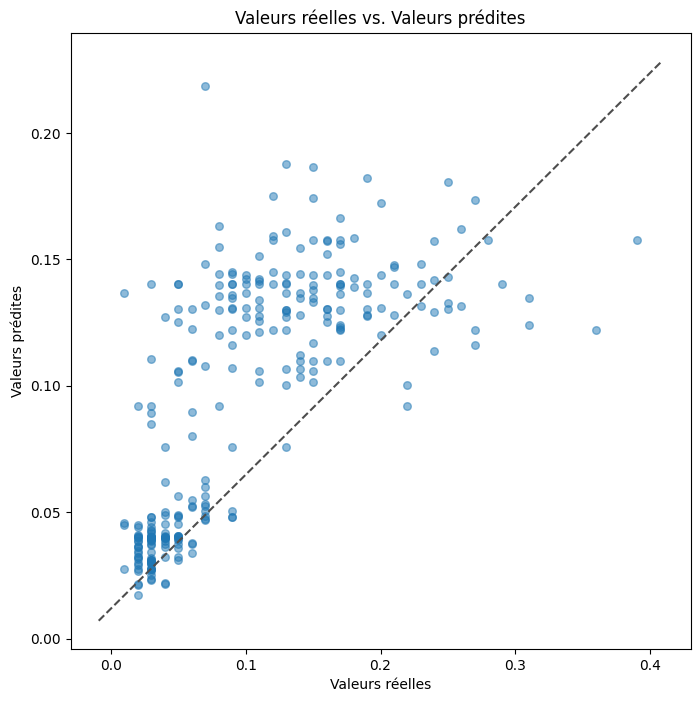

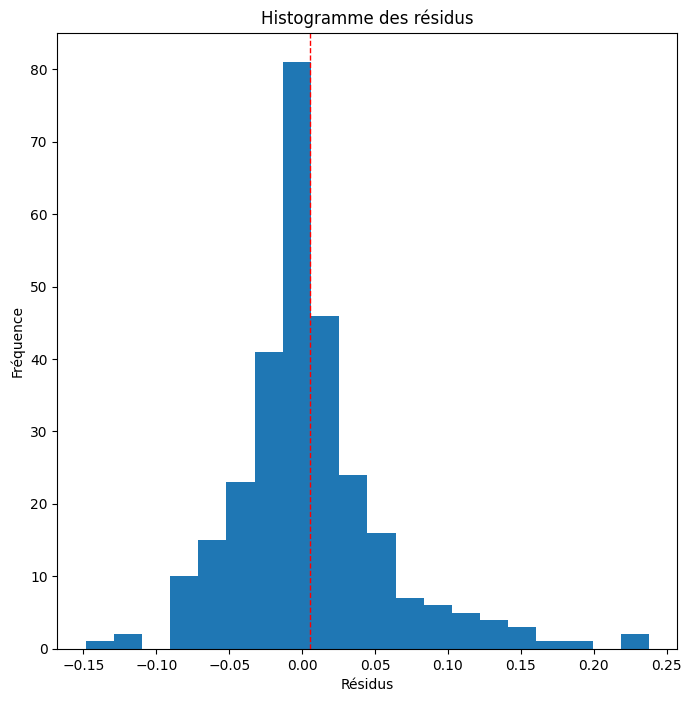

In [ ]:
param_grid = {'C': c_values, 
              'epsilon': [0.01, 0.1, 1],
              'gamma': ['scale', 'auto']}
grid = GridSearchCV(SVR(kernel='rbf'), param_grid=param_grid, cv=5)

grid.fit(X_train, y_train.values.ravel())
y_pred = grid.predict(X_test)
y_true = y_test.values.ravel()
mse = np.mean((y_true- y_pred) ** 2)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)

print('MAE:', mae)

print('R²:', r2)
print("RMSE", rmse)
print("MSE", mse)

print("Best hyperparameters: ", grid.best_params_)
print("Cross-validation score: ", grid.best_score_)
plot_true_vs_predicted(y_true, y_pred)
plot_residuals(y_true, y_pred)


MAE: 0.03514293479988089
R²: 0.5195748582142181
RMSE 0.05165185527525489
MSE 0.0026679141533758766
Best hyperparameters:  {'C': 1.5848931924611136, 'degree': 4, 'epsilon': 0.01}
Cross-validation score:  0.500065736873959


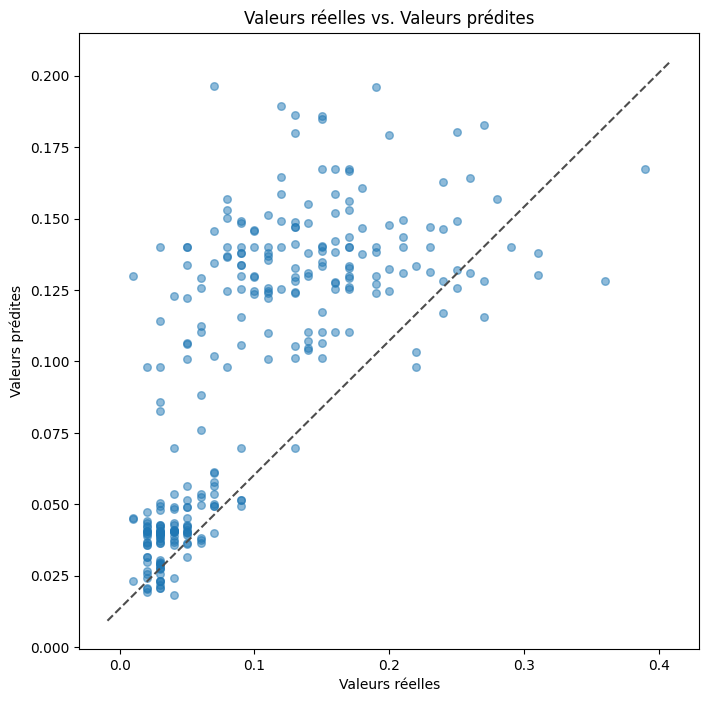

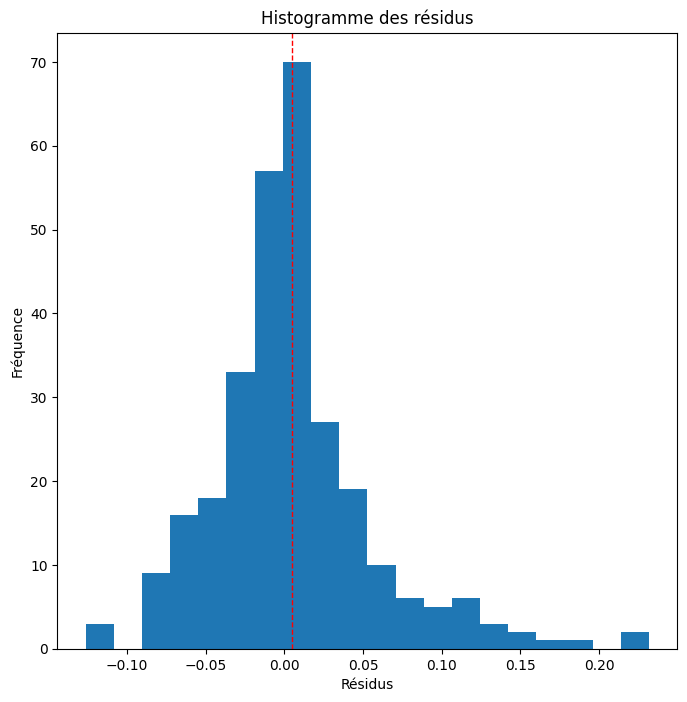

In [ ]:
param_grid = {'C': c_values, 
              'epsilon': [0.01, 0.1, 1],
              'degree':[2,3,4,5,6,7]}
grid = GridSearchCV(SVR(kernel='poly'), param_grid=param_grid, cv=5)

grid.fit(X_train, y_train.values.ravel())
y_pred = grid.predict(X_test)
y_true = y_test.values.ravel()
mse = np.mean((y_true- y_pred) ** 2)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)

print('MAE:', mae)

print('R²:', r2)

print("RMSE", rmse)

print("MSE", mse)
print("Best hyperparameters: ", grid.best_params_)
print("Cross-validation score: ", grid.best_score_)
plot_true_vs_predicted(y_true, y_pred)
plot_residuals(y_true, y_pred)

MAE: 0.04486922247343017
R²: 0.26964450023733066
RMSE 0.06368544884307702
MSE 0.00405583639434418
Best hyperparameters:  {'C': 0.001, 'epsilon': 0.01}
Cross-validation score:  0.25650094974165116


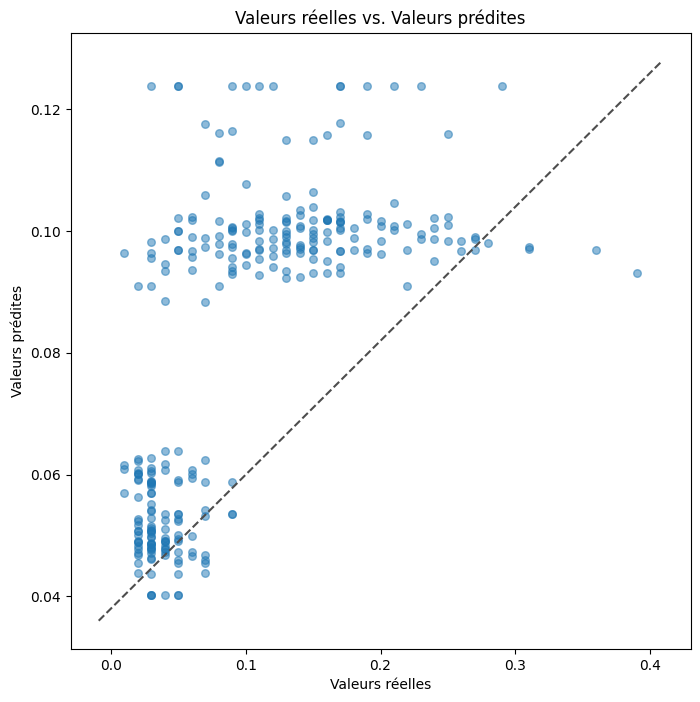

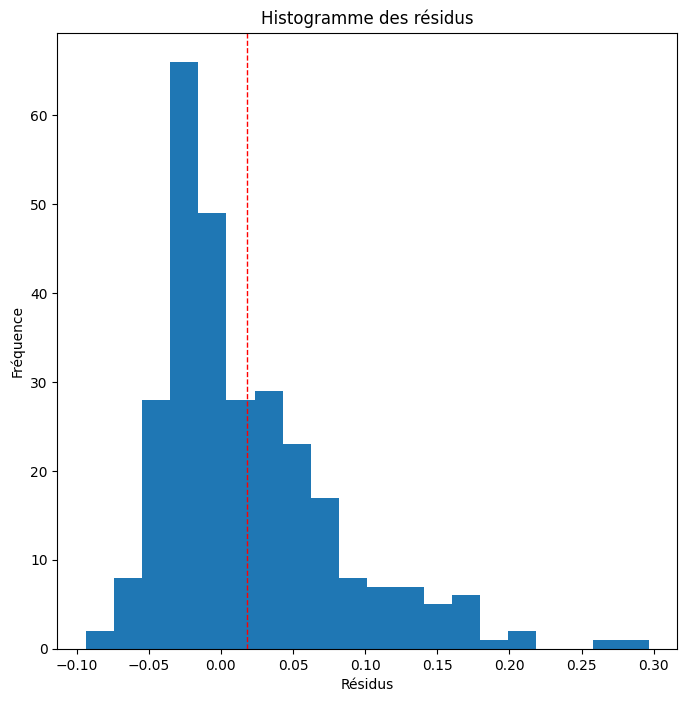

In [ ]:
param_grid = {'C': c_values, 
              'epsilon': [0.01, 0.1, 1]}
grid = GridSearchCV(SVR(kernel='sigmoid'), param_grid=param_grid, cv=5)

grid.fit(X_train, y_train.values.ravel())
y_pred = grid.predict(X_test)
y_true = y_test.values.ravel()
mse = np.mean((y_true- y_pred) ** 2)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)

print('MAE:', mae)
print('R²:', r2)

print("RMSE", rmse)

print("MSE", mse)
print("Best hyperparameters: ", grid.best_params_)
print("Cross-validation score: ", grid.best_score_)
plot_true_vs_predicted(y_true, y_pred)
plot_residuals(y_true, y_pred)

MAE: 0.03603437307378169
R²: 0.509775792995962
RMSE 0.05217595877711092
MSE 0.0027223306743107776
Best hyperparameters:  {'alpha': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
Cross-validation score:  0.4995081900509167


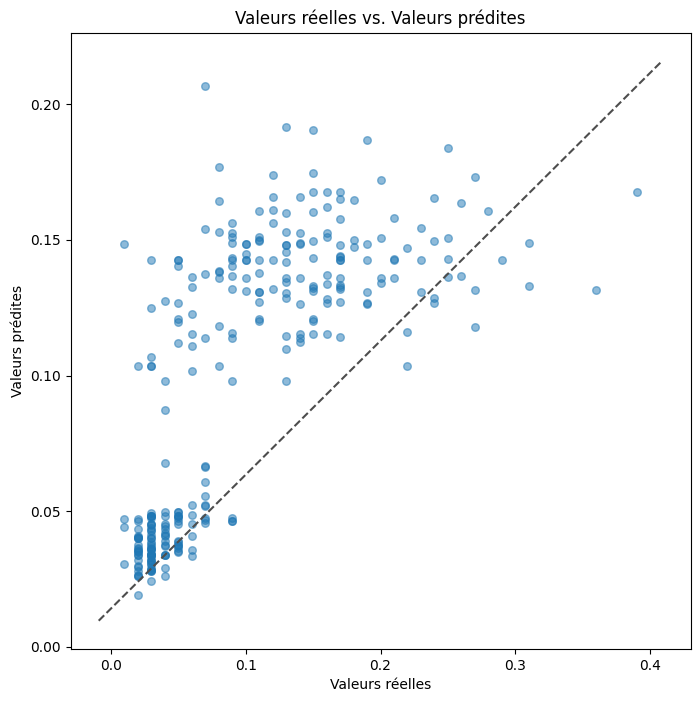

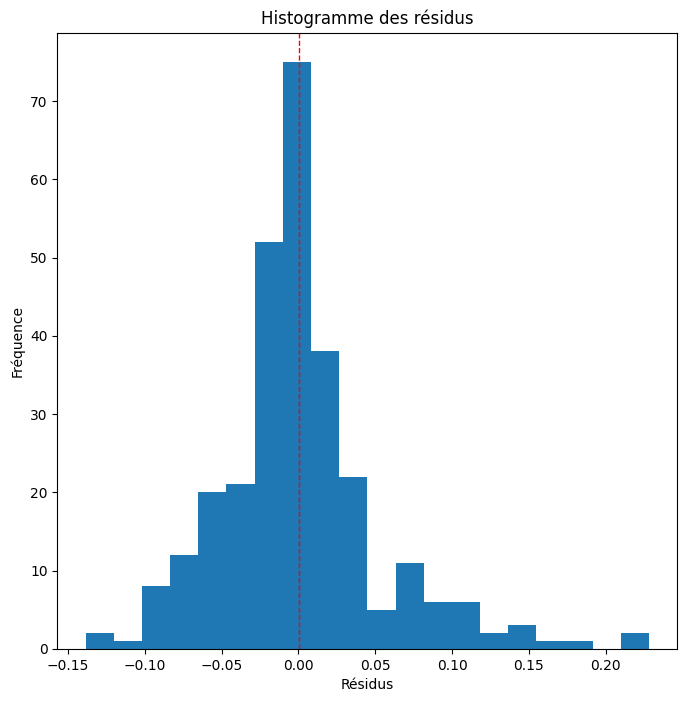

In [ ]:
#kernel ridge regression
from sklearn.kernel_ridge import KernelRidge

param_grid = {    'alpha': [0.1, 0.5, 1.0],  # Paramètre de régularisation
    'kernel': ['linear', 'rbf'],  # Type de noyau
    'gamma': [0.01, 0.1, 1.0]  # Paramètre du noyau rbf
    }
grid = GridSearchCV(KernelRidge(), param_grid=param_grid, cv=5, n_jobs=-1)

grid.fit(X_train, y_train.values.ravel())
y_pred = grid.predict(X_test)
y_true = y_test.values.ravel()
mse = np.mean((y_true- y_pred) ** 2)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)

print('MAE:', mae)
print('R²:', r2)
print("RMSE", rmse)

print("MSE", mse)
print("Best hyperparameters: ", grid.best_params_)
print("Cross-validation score: ", grid.best_score_)
plot_true_vs_predicted(y_true, y_pred)
plot_residuals(y_true, y_pred)

In [ ]:
nlp = wines.copy()
#enlever les colonnes qu'on ne compte pas utiliser
nlp = nlp.drop(columns = ['Table.No.', 'Cultivar', 'Recommend', 'RecReg', 'Reg',
       'Harvest date', 'DOY'])
#verifier qu'on a nos colonnes désirées
nlp.columns 

columns = list(nlp.columns)

nlp.dropna(subset = columns, inplace=True)
nlp.reset_index(drop=True, inplace=True)
nlp.columns

Index(['Color', 'Must.Brix', 'Must.Tacid', 'Must.pH', 'Wine.Alcohol',
       'Wine.Facid', 'Wine.Extract', 'Wine.Tannin', 'Wine.Tasting'],
      dtype='object')

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


# sélection des colonnes à utiliser
numerical_cols = ['Color', 'Must.Brix', 'Must.Tacid', 'Must.pH', 'Wine.Alcohol',
       'Wine.Facid', 'Wine.Extract', 'Wine.Tannin'] # ajouter d'autres variables numériques
text_col = 'Wine.Tasting' # colonne contenant la description

# préparation des données numériques
X_numerical = nlp[numerical_cols].values
y = nlp['Wine.Tasting'].values



# séparation des données d'entraînement et de test
X_num_train, X_num_test, y_train, y_test = train_test_split(X_numerical, y, test_size=0.2)

# création du pipeline de prétraitement et du modèle
preprocessor = ColumnTransformer(transformers=[
    ('num', 'passthrough', numerical_cols),
    ('text', 'passthrough', text_col)
])
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [ ]:
data = pd.concat([temp_avg,temp_min, temp_max], axis = 1)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from sklearn.cluster import KMeans

# Charger les données dans un DataFrame
data = pd.read_csv('chemin/vers/le/fichier.csv')

# Paramètres pour le lissage et la classification
window_length = 200  # Longueur de la fenêtre de lissage (en jours)
n_clusters = 3  # Nombre de clusters pour la classification

# Lissage des courbes de températures pour chaque observation
for i, row in data.iterrows():
    temp_min = row['temp_min']
    temp_max = row['temp_max']
    temp_moy = row['temp_moy']
    smooth_min = savgol_filter(temp_min, window_length, 3)
    smooth_max = savgol_filter(temp_max, window_length, 3)
    smooth_moy = savgol_filter(temp_moy, window_length, 3)
    data.loc[i, 'temp_min_smooth'] = smooth_min
    data.loc[i, 'temp_max_smooth'] = smooth_max
    data.loc[i, 'temp_moy_smooth'] = smooth_moy

# Classification des profils météorologiques pour chaque observation
for i in range(len(data)):
    temp_min_smooth = data.loc[i, 'temp_min_smooth']
    temp_max_smooth = data.loc[i, 'temp_max_smooth']
    temp_moy_smooth = data.loc[i, 'temp_moy_smooth']
    X = np.array([temp_min_smooth, temp_max_smooth, temp_moy_smooth]).T
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
    data.loc[i, 'cluster'] = kmeans.labels_[0]

# Visualisation des profils météorologiques pour chaque observation
for i in range(len(data)):
    cluster = data.loc[i, 'cluster']
    temp_moy_smooth = data.loc[i, 'temp_moy_smooth']
    plt.plot(temp_moy_smooth, label='Observation '+str(i+1)+' - Cluster '+str(cluster+1))
plt.legend()
plt.show()